### Data

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets

In [ ]:
#dividir os training  testing img

train = datasets.MNIST("", train=True, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                       transform = transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 81000849.92it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 42104864.03it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21157861.65it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12854607.81it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
#dividir os training  testing sets

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [ ]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][0], data[1][0]

print(y)

tensor(5)


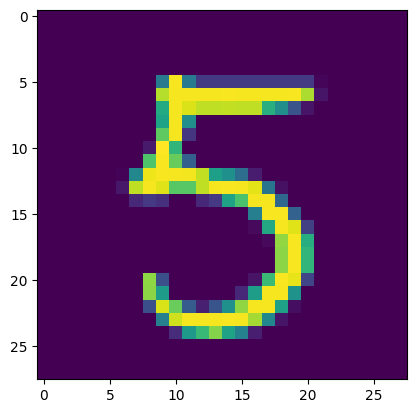

In [ ]:
import matplotlib.pyplot as plt

#porque o tensor estava no formato 1, 28, 28 nos queremos so 28 X 28 ent view(28, 28)

plt.imshow(data[0][0].view(28,28))

In [ ]:
#verificar se esta balanced
#dicionario do formato numero : instances do numero

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
#distribuiçao dos numero em percentagens(esta bom o suficiente)

for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#inicializar nn.module
#fc1 -> input layer/ fc2 e fc3 -> processing layers/ fc4 -> output layer/

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    #                input v     v output
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

#funçao relU opera no output portanto n queremos q ela opere no ouput final

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)



net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
#-1 no view significa q o tamanho n é definido
#primeira vez a passar info na NN n significa muito por agora

x = torch.rand((28, 28))
x = x.view(-1, 28*28)

output = net(x)
output

tensor([[-2.2970, -2.1618, -2.3345, -2.4465, -2.2282, -2.3630, -2.3633, -2.2835,
         -2.3826, -2.2013]], grad_fn=<LogSoftmaxBackward0>)

treinar

dar print a loss ao longo de 3 epochs selecionados(baixou uhuu)

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    #X é os valores dos pixeis q constituem 1 numero, y é o respetivo numero
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.2598, grad_fn=<NllLossBackward0>)
tensor(0.0130, grad_fn=<NllLossBackward0>)


print da accuracy do modelo

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 28*28))
    for idx,i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct+=1
      total += 1

print("accuracy: ", round(correct/total, 3))

accuracy:  0.981


testar casos especificos

<function matplotlib.pyplot.show(close=None, block=None)>

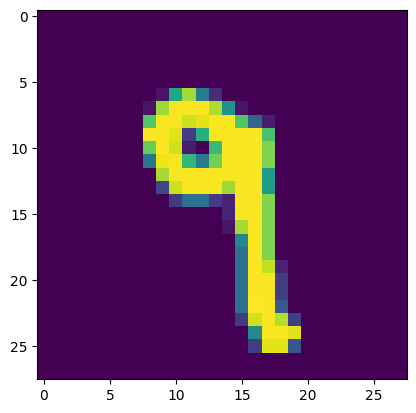

In [ ]:
plt.imshow(X[1].view(28, 28))
plt.show

In [ ]:
print(torch.argmax(net(X[1].view(-1, 28*28))))
print(y[1])

tensor(9)
tensor(9)


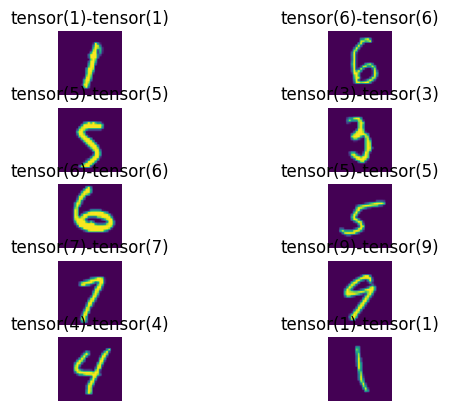

In [ ]:
import PIL

for data in trainset:
    X, y = data

    for num, x in enumerate(X):
      plt.subplot(5,2,num+1)
      plt.title(str(y[num]) + "-" + str(torch.argmax(net(x.view(-1, 28*28)))))
      plt.axis('off')
      plt.imshow(x.view(28,28))
    break
